# Questão 3

A propriedade de ordenação topológica do algoritmo SOM pode ser usada para formar uma representação bidimensional abstrata para fins de visualização de um espaço de entrada de alta dimensionalidade. O objetivo é visualizar os dados de dimensão 8 em um espaço de dimensão 2, constituído pela grade de neurônios. Para investigar esta forma de representação, considere uma grade bidimensional de neurônios que é treinada tendo como entrada os  dados  oriundos  de  quatro  distribuições  gaussianas,  $C_1$,  $C_2$,  $C_3$,  e  $C_4$,  em  um  espaço  de entrada  de  dimensionalidade  igual  a  oito,  isto  é $\textbf{x} = (x_1, x_2, x_3, \dots, x_8)^t$. Todas as nuvens de dados  têm variâncias unitária, mas centroídes (vetores média) diferentes,  dados por $\textbf{m}_1 = (0,0,0,0,0,0,0,0)^t$, $\textbf{m}_2 = (4,0,0,0,0,0,0,0)^t$, $\textbf{m}_3 = (0,0,0,4,0,0,0,0)^t$, $\textbf{m}_4 = (0,0,0,0,0,0,0,4)^t $    

a) Gere as quatro distribuições gaussianas correspondentes a cada centroíde. 

b) Utilizando uma rede SOM formada por uma grade de neurônio 10x10 neurônio obtenha a representação das quatro distribuições em duas dimensões no SOM. 

In [50]:
import numpy as np
import matplotlib.pyplot as plt

# Letra a)

N_SAMPLES = 1000
VAR = 1

M = np.array([
    [0, 0, 0, 0, 0, 0, 0, 0],
    [4, 0, 0, 0, 0, 0, 0, 0],
    [0, 0, 0, 4, 0, 0, 0, 0],
    [0, 0, 0, 0, 0, 0, 0, 4],
])

data_blocks = []
data_targets = []

for i, m in enumerate(M):
    random_data = np.random.normal(
        loc=m, 
        scale=VAR, 
        size=(int(N_SAMPLES/len(M)), 8)
    )
    data_blocks.append(random_data)
    data_targets.append([f'Gaussiana {i+1}'] * len(random_data))

X = np.vstack(data_blocks)
y = np.concatenate(data_targets)

print(f'Shape X: {X.shape}')
print(f'Shape y: {y.shape}')


Shape X: (1000, 8)
Shape y: (1000,)


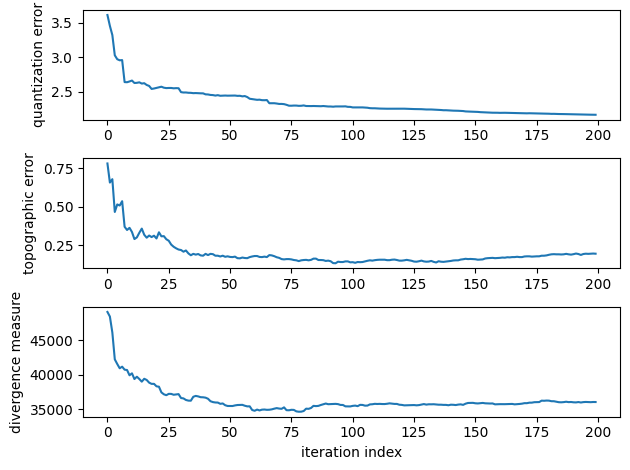

In [53]:
# Letra b)

from minisom import MiniSom

som = MiniSom(10, 10, X.shape[1], sigma=1.5, learning_rate=.5,
              neighborhood_function='gaussian', random_seed=10)

max_iter = 200
q_error = []
t_error = []
d_error = []

for i in range(max_iter):
    rand_i = np.random.randint(len(X))
    som.update(X[rand_i], som.winner(X[rand_i]), i, max_iter)
    q_error.append(som.quantization_error(X))
    t_error.append(som.topographic_error(X))
    d_error.append(som.distortion_measure(X))

plt.subplot(3,1,1)
plt.plot(np.arange(max_iter), q_error)
plt.ylabel('quantization error')
plt.subplot(3,1,2)
plt.plot(np.arange(max_iter), t_error)
plt.ylabel('topographic error')
plt.subplot(3,1,3)
plt.plot(np.arange(max_iter), d_error)
plt.ylabel('divergence measure')
plt.xlabel('iteration index')
plt.tight_layout()
plt.show()

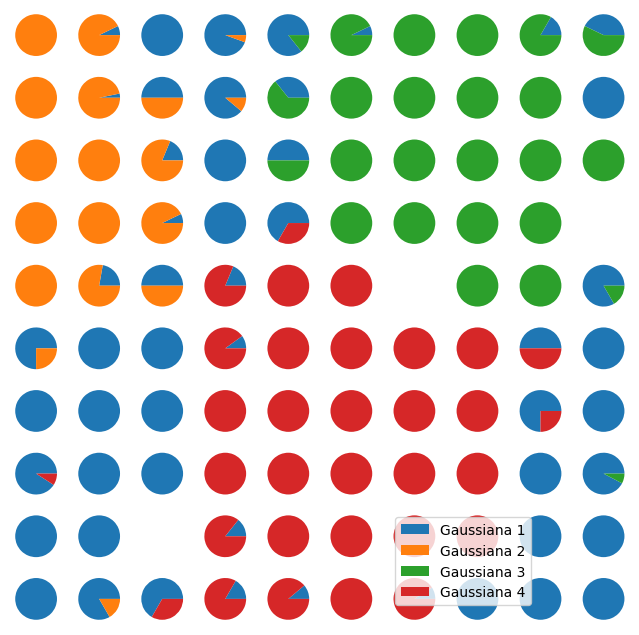

In [58]:
import matplotlib.gridspec as gridspec

labels_map = som.labels_map(X, y)

fig = plt.figure(figsize=(8, 8))
the_grid = gridspec.GridSpec(10, 10, fig)

for position in labels_map.keys():
    labels_fracs = [labels_map[position][l] for l in np.unique(y)]
    plt.subplot(the_grid[10-1-position[1],
                         position[0]], aspect=1)
    patches, texts = plt.pie(labels_fracs)

plt.legend(patches, np.unique(y), loc='upper left')
plt.show()